# 1. Введение

## Вспомним как выглядит цикл решения мл-задачи

![crisp-dm](./images/crisp-dm.png)

### Предсказание оттока клиентов

Чтобы потренироваться решать задачу **оттока**, сначала поймем зачем может понядобиться такая задача.

Представим, что у нас есть банк, и клиенты хранят у нас свои деньги, понятно, что мы можем использовать их средства для операций компании. И чем больше у нас запасы тем больший потенциал у нас есть. Хорошо, получается нам важен каждый клиент.

Предположим, что всего у нас 100 000 клиентов и каждый хранит на своем счете **1 миллион рублей**. Получается у нас есть **10 миллиардов**. \
**Ого! И это только средств, а сколько мы можем заработать на каждом миллионе!**


![churn2](./images/churn2.png)

А что если вдруг 10% клиентов от нас уйдет?

**Мы потеряем миллиард рублей средств да еще и нашу прибыль сократим. \
Нужно стараться удержать наших клиентов, каждый очень ценен!**

Хорошо, мы поняли нашу задачу - это бинарная классификация на два класса **уйдет** клиент из банка или **не уйдет**.
Будем предсказывать вероятность того что клиент оттечет, то есть число в диапазоне от 0 до 1.


Бизнес выгода ясна, также представим, что данные мы тоже придумали откуда достать.

Теперь нам нужно понять **как же уменьшить наши потери** в миллион до какого-то небольшого числа?

![churn4](./images/churn4.png)

### Составим план действий:

#### 1) Подготовка данных
    * Выборка данных
    * Разведочный анализ данных
    * Очистка данных на основе анализа
    * Генерация вспомогательных данных
    
#### 2) Моделирование
    * Выбор алгоритмов	
    * Выбор мета-метрики	
    * План тестирования алгоритма
    * Обучение моделей
    * Оценка качества модели

# 2. Подготовка данных


![churn5](./images/churn5.png)

   - [x] Выборка данных
   - [ ] Разведочный анализ данных
   - [ ] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных
   - [ ] Построение бейзлайна

Выборка данных у нас уже есть - мы будем использовать данные с сайта kaggle для похожей задачи. \
**Ссылка на соревнование:** https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

**Разведочный анализ данных:**
В рамках разведочного анализа данных его также называют **EDA(Exploratory Data Analysis)** мы стремимся пределить и визуализировать, какие факторы способствуют оттоку клиентов.

In [1]:
#Наши стандартные библиотеки
import numpy as np
import pandas as pd

# Для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [22]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8160,15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0
1,6333,15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0
2,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
3,5352,15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0
4,4315,15582276,Greco,638,France,Male,34,5,133501.36,1,0,1,155643.04,0


In [4]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,4801,15679810,Chapman,690,France,Male,39,6,0.00,2,1,0,160532.88
1,2102,15778934,Napolitani,678,Spain,Female,49,8,0.00,2,0,1,98090.69
2,4487,15660646,Fanucci,528,France,Male,35,3,156687.10,1,1,0,199320.77
3,1127,15593973,Wilkie,663,Spain,Female,33,8,122528.18,1,1,0,196260.30
4,383,15568240,Ting,492,Germany,Female,30,10,77168.87,2,0,1,146700.22


![churn8](./images/churn10.png)

In [5]:
from teacher_bot.churn_prediction import ChurnPrediction

Это Бот ProductStar он будет проверять твои задания

In [6]:
BotProductStar = ChurnPrediction()

Привет! Приятно познакомиться!


In [7]:
BotProductStar.test_task(df = train)

Думаю...
Ого! Датасет, сейчас мы будем его исследовать, интересно, что в нем.
Сам я не справляюсь - нужна твоя помощь


### Задание 1. Бот тебе его расскажет - запусти ячейку ниже.

In [8]:
BotProductStar.drop_task()

В датафрейме есть несколько колонок, в которых слишком много уникальных значений, нужно их найти и удалить.А получившийся датафрейм передать мне в параметрах.


In [9]:
BotProductStar.drop_task(df=train)

Думаю...
Нужно ответить на очень важный вопрос - сколько уникальных значений имеет каждый признак.


In [10]:
train.nunique()

RowNumber          7200
CustomerId         7200
Surname            2459
CreditScore         455
Geography             3
Gender                2
Age                  68
Tenure               11
Balance            4566
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    7200
Exited                2
dtype: int64

In [11]:
train = train.drop(columns=["RowNumber", "CustomerId"])
train = train.drop(["Surname"], axis = 1)

In [12]:
test = test.drop(columns=["RowNumber", "CustomerId"])
test = test.drop(["Surname"], axis = 1)

![churn8](./images/churn11.png)

In [13]:
BotProductStar.null_task()

Нужно понять есть ли в датафрейме пропущенные значения и отправить ответ мне
Я понимаю только 'Да' или 'Нет'


In [14]:
BotProductStar.null_task(answer='Нет')

Думаю...
Ура! Второе задание позади!
Кодовая фраза Science


   - [x] Выборка данных
   - [ ] Разведочный анализ данных
   - [x] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных

In [15]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0
1,619,France,Female,35,4,90413.12,1,1,1,20555.21,0
2,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
3,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0
4,638,France,Male,34,5,133501.36,1,0,1,155643.04,0


Данные выглядят как снимок на определенный момент времени 
Возможно баланс на заданную дату, что **оставляет много вопросов:**
    * Какая это дата и какое значение она имеет?
    * Можно ли получить баланс за определенный период времени, а не за одну дату.
    * Есть клиенты, которые вышли, но все еще имеют остаток на счете! Что бы это значило? Могли они выйти из продукта, а не из банка?
    * Что значит быть активным участником и есть ли в этом разные степени? Может быть, лучше вместо этого предоставить счет транзакций как по кредитам, так и по дебету счета?
Разбивка на продукты, купленные клиентом, может предоставить дополнительную информацию, которая увеличит список продуктов.


![churn8](./images/churn14.png)

Здесь мы приступаем к моделированию без контекста, хотя обычно наличие контекста и лучшее понимание процесса извлечения данных дает более качественные модели.

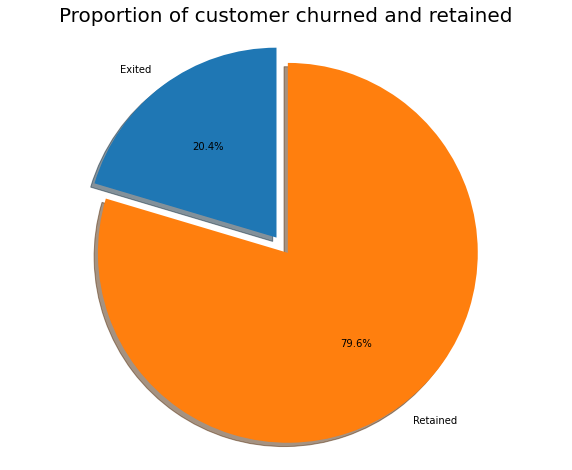

In [16]:
labels = 'Exited', 'Retained'
sizes = [train.Exited[train['Exited']==1].count(), train.Exited[train['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

Таким образом, около 20% клиентов ушли. Базовая модель может предполагать, что 20% клиентов уйдут.
Учитывая, что 20% - это небольшое число, нам необходимо убедиться, что выбранная модель действительно предсказывает с большой точностью эти 20%, поскольку для банка интересно идентифицировать и сохранить клиентов.

##### Анализ категориальных переменных

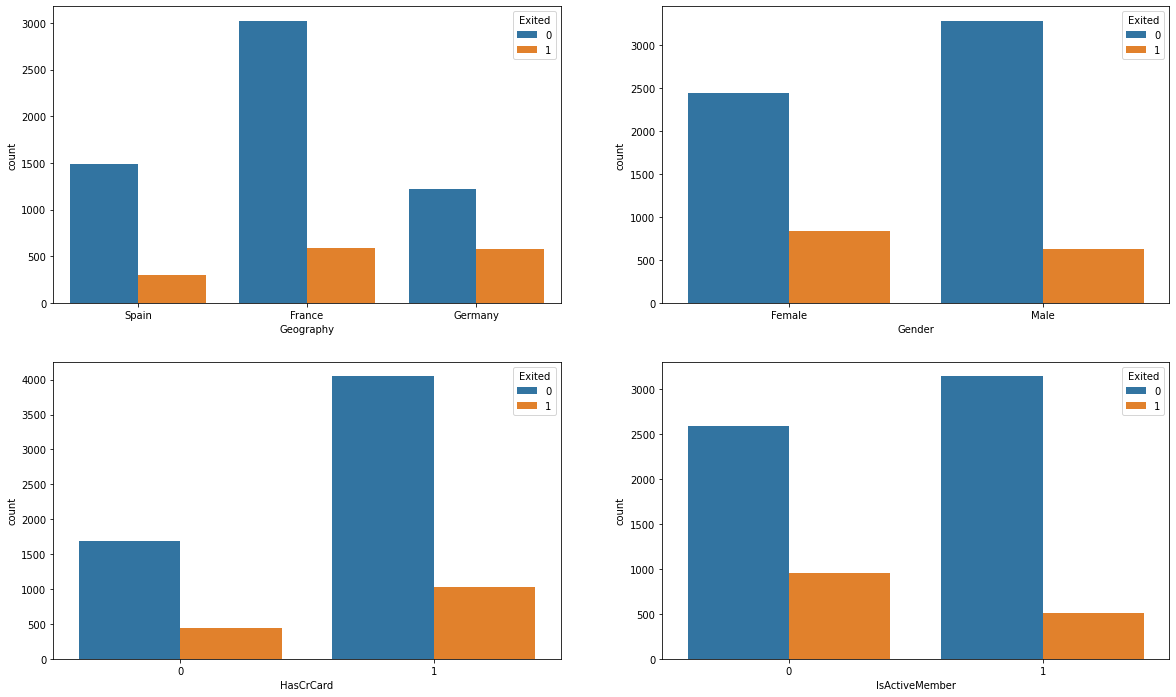

In [17]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = train, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = train, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = train, ax=axarr[1][1])

**Отметим следующее:**

* Большинство данных от лиц из Франции. Возможно, у банка недостаточно ресурсов для обслуживания клиентов в тех областях, где у него меньше клиентов.
* Доля сменяющих клиентов женщин также выше, чем доля клиентов-мужчин.
* Интересно, что большинство клиентов, которые ушли, - это клиенты с кредитными картами. Учитывая, что у большинства клиентов есть кредитные карты, это может оказаться простым совпадением.
* Неудивительно, что у неактивных участников больше отток. 
* Общая доля неактивных клиентов довольно высока, можно предположить, что банку потребуется программа, направленная на превращение этой группы в активных клиентов.

##### Анализ количественных переменных

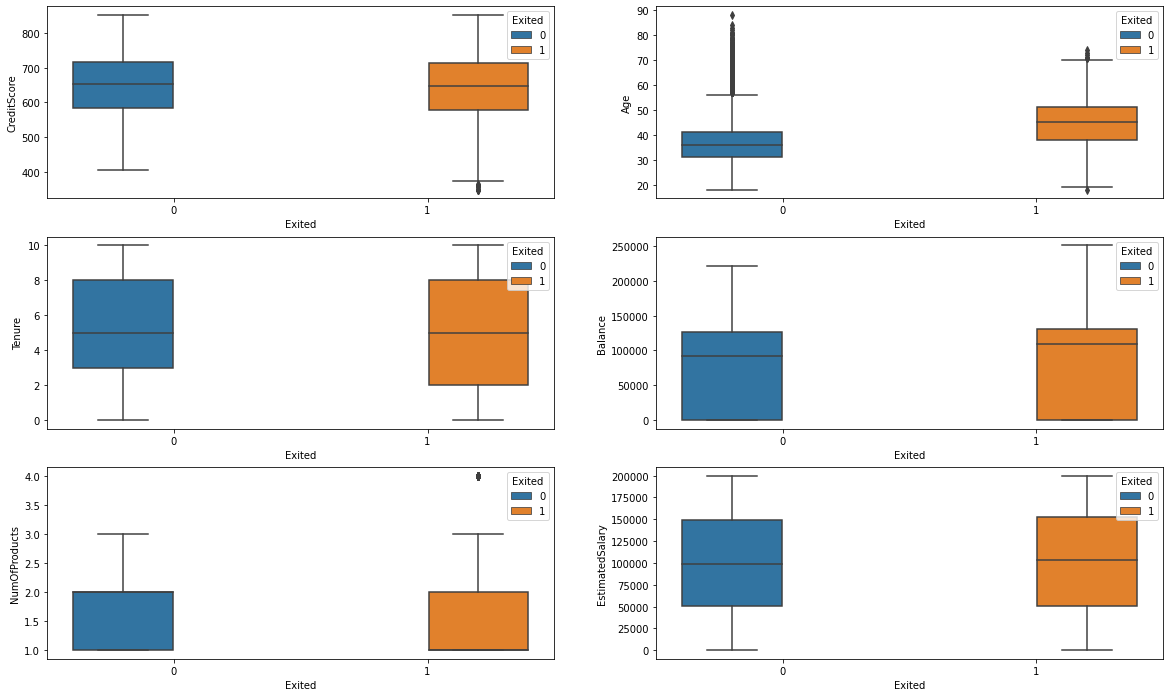

In [18]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = train, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = train , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = train, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = train, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = train, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = train, ax=axarr[2][1])

**Отметим следующее:**
* Нет существенной разницы в распределении кредитного рейтинга между оставшимися и оттекшими клиентами.
* Старшие клиенты оттекают чаще, чем более молодые, это намекает на разницу в предпочтениях обслуживания в возрастных категориях. Банку может потребоваться пересмотреть свой целевой рынок или пересмотреть стратегию удержания клиентов между разными возрастными группами.
* Что касается срока владения, то клиенты, находящиеся на крайнем конце (мало времени проводившие с банком или много времени в банке), с большей вероятностью уйдут, чем те, которые имеют средний срок.
* Банк теряет клиентов со значительными остатками на банковских счетах, что может снизить их доступный капитал для кредитования.
* Ни продукт, ни зарплата не оказывают существенного влияния на вероятность оттока.

В целом к разведочному анализу данных можно также отнести **построение базового решения**. Важно делать на самом первом этапе, чтобы на пальцах прикидывать, а сколько можно съэкономить денег.

В жизни у нас были бы ограничения
Скажем, чтобы привлечь клиента мы тратим 100 000р, а зарабатываем в год на каждом 200 000р.

Тогда при таких метриках давайте посмотрим что у нас получилось бы.

Всего видим, что ушло 390 клиентов. 
Получается мы потеряли 390 000 000р!

Есть ли что-то что мы могли с этим сделать?

Давайте посчитаем экономию, при предскзаании алгоритмом, который случайно возвращает 0 или 1, то есть с вероятностью 0.5 говорит что клиент оттечет и с такой же вероятностью, что клиент не оттечет.

Отсюда поймем а имеею ли смысл вообще акции по привлечению клиентов.

In [19]:
from sklearn.metrics import classification_report

In [20]:
baseline = [0.5]*len(test)

In [23]:
submission = test[['RowNumber']].copy()
submission['predict'] = baseline

##### С помощью этого метода можно делать посылки боту с предскзаанниями, а он будет возвращать результат.

In [24]:
BotProductStar.production_quality()

Я умею оценивать качество на тесте. Метрика, которую я мерию ROC-AUC.Тут можно отправлять сделанные предсказания. Чтобы я не запутался куда какие предсказания, давай будем присылать в виде датафрейма у которого первая колонка 'RowNumber', а вторая 'predict'. Пример посылки мы пробовали когда отправляли submission.


In [25]:
BotProductStar.production_quality(answer=submission)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.5
Ого! Да это же самое хитрое решение - хоть я и простой бот, но монетку подбросить и наугад сказать даже я смогу.Я уверен - как-то точно можно улучшить предсказания!


In [26]:
#TODO: пересчитать на трейне сколко экономим 
print(classification_report(merged.Exited_x,  merged.Exited_y))

NameError: name 'merged' is not defined

In [ ]:
tn, fp, fn, tp = confusion_matrix(df_test.Exited,  baseline).ravel()

In [ ]:
print(f'Удержали уходящих: {tp}')
print(f'Удерживали, но они и не собирались уходить: {fp}')
print(f'Не стали удерживать и они ушли: {fn}')
print(f'Правильно не стали удерживать: {tn}')

Посчитаем сколько мы потратили всего на привлечение:
206 + 793 * 100 000 =  99 900 000

А сколько потеряли на тех, кто ушел:
184 000 000

Потери, если бы мы **ничего не делали: 390 000 000**\
Потери при **простейшей модели: 283 900 000**

**Экономия: 106 100 000**

Ого и это мы даже машинное обучение еще не начали использовать!

На этом наш разведочный анализ можно закончить - мы узнали все, что нас интересует.

   - [x] Выборка данных
   - [x] Разведочный анализ данных
   - [ ] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных
   - [ ] Предобработка данных

Следующая часть урока полностью ложится на ваши плечи:
* Нужно правильно сгенерировать вспомогательные признаки, но сильно можно не увлекаться.
* Правильно из обработать для подачи в модель.
* И построить модель, которая будет давать достаточное качество.

In [27]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

In [28]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''
train.loc[train.HasCrCard == 0, 'HasCrCard'] = -1
train.loc[train.IsActiveMember == 0, 'IsActiveMember'] = -1
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8160,15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0
1,6333,15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0
2,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,-1,102085.35,0
3,5352,15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0
4,4315,15582276,Greco,638,France,Male,34,5,133501.36,1,-1,1,155643.04,0


In [29]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''
test.loc[test.HasCrCard == 0, 'HasCrCard'] = -1
test.loc[test.IsActiveMember == 0, 'IsActiveMember'] = -1
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,4801,15679810,Chapman,690,France,Male,39,6,0.00,2,1,-1,160532.88
1,2102,15778934,Napolitani,678,Spain,Female,49,8,0.00,2,-1,1,98090.69
2,4487,15660646,Fanucci,528,France,Male,35,3,156687.10,1,1,-1,199320.77
3,1127,15593973,Wilkie,663,Spain,Female,33,8,122528.18,1,1,-1,196260.30
4,383,15568240,Ting,492,Germany,Female,30,10,77168.87,2,-1,1,146700.22


In [30]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (train[i].dtype == np.str or train[i].dtype == np.object):
        for j in train[i].unique():
            train[i+'_'+j] = np.where(train[i] == j,1,-1)
        remove.append(i)
train = train.drop(remove, axis=1)
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
0,8160,15637427,Lu,461,25,6,0.00,2,1,1,15306.29,0,1,-1,-1,1,-1
1,6333,15793046,Holden,619,35,4,90413.12,1,1,1,20555.21,0,-1,1,-1,1,-1
2,8896,15658972,Foster,699,40,8,122038.34,1,1,-1,102085.35,0,-1,1,-1,1,-1
3,5352,15679048,Koger,558,41,2,124227.14,1,1,1,111184.67,0,-1,-1,1,-1,1
4,4315,15582276,Greco,638,34,5,133501.36,1,-1,1,155643.04,0,-1,1,-1,-1,1


In [31]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (test[i].dtype == np.str or test[i].dtype == np.object):
        for j in test[i].unique():
            test[i+'_'+j] = np.where(test[i] == j,1,-1)
        remove.append(i)
test = test.drop(remove, axis=1)
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Geography_Germany,Gender_Male,Gender_Female
0,4801,15679810,Chapman,690,39,6,0.00,2,1,-1,160532.88,1,-1,-1,1,-1
1,2102,15778934,Napolitani,678,49,8,0.00,2,-1,1,98090.69,-1,1,-1,-1,1
2,4487,15660646,Fanucci,528,35,3,156687.10,1,1,-1,199320.77,1,-1,-1,1,-1
3,1127,15593973,Wilkie,663,33,8,122528.18,1,1,-1,196260.30,-1,1,-1,-1,1
4,383,15568240,Ting,492,30,10,77168.87,2,-1,1,146700.22,-1,-1,1,-1,1


In [32]:
# minMax scaling the continuous variables
minVec = train[continuous_vars].min().copy()
maxVec = train[continuous_vars].max().copy()
train[continuous_vars] = (train[continuous_vars]-minVec)/(maxVec-minVec)
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
0,8160,15637427,Lu,0.222,0.100000,0.6,0.000000,0.333333,1,1,0.076118,0,1,-1,-1,1,-1
1,6333,15793046,Holden,0.538,0.242857,0.4,0.360358,0.000000,1,1,0.102376,0,-1,1,-1,1,-1
2,8896,15658972,Foster,0.698,0.314286,0.8,0.486406,0.000000,1,-1,0.510225,0,-1,1,-1,1,-1
3,5352,15679048,Koger,0.416,0.328571,0.2,0.495130,0.000000,1,1,0.555744,0,-1,-1,1,-1,1
4,4315,15582276,Greco,0.576,0.228571,0.5,0.532094,0.000000,-1,1,0.778145,0,-1,1,-1,-1,1


In [33]:
test[continuous_vars] = (test[continuous_vars]-minVec)/(maxVec-minVec)
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Geography_Germany,Gender_Male,Gender_Female
0,4801,15679810,Chapman,0.680,0.300000,0.6,0.000000,0.333333,1,-1,0.802606,1,-1,-1,1,-1
1,2102,15778934,Napolitani,0.656,0.442857,0.8,0.000000,0.333333,-1,1,0.490242,-1,1,-1,-1,1
2,4487,15660646,Fanucci,0.356,0.242857,0.3,0.624505,0.000000,1,-1,0.996640,1,-1,-1,1,-1
3,1127,15593973,Wilkie,0.626,0.214286,0.8,0.488358,0.000000,1,-1,0.981330,-1,1,-1,-1,1
4,383,15568240,Ting,0.284,0.171429,1.0,0.307571,0.333333,-1,1,0.733409,-1,-1,1,-1,1


In [34]:
test

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Geography_Germany,Gender_Male,Gender_Female
0,4801,15679810,Chapman,0.680,0.300000,0.6,0.000000,0.333333,1,-1,0.802606,1,-1,-1,1,-1
1,2102,15778934,Napolitani,0.656,0.442857,0.8,0.000000,0.333333,-1,1,0.490242,-1,1,-1,-1,1
2,4487,15660646,Fanucci,0.356,0.242857,0.3,0.624505,0.000000,1,-1,0.996640,1,-1,-1,1,-1
3,1127,15593973,Wilkie,0.626,0.214286,0.8,0.488358,0.000000,1,-1,0.981330,-1,1,-1,-1,1
4,383,15568240,Ting,0.284,0.171429,1.0,0.307571,0.333333,-1,1,0.733409,-1,-1,1,-1,1
5,2487,15745001,Kovalev,0.666,0.257143,0.7,0.000000,0.333333,1,-1,0.523738,-1,1,-1,-1,1
6,3636,15571689,Kelechi,0.780,0.271429,0.5,0.000000,0.333333,1,1,0.137259,1,-1,-1,-1,1
7,3685,15714006,Gardener,0.264,0.242857,0.2,0.530541,0.000000,-1,1,0.399534,1,-1,-1,-1,1
8,8789,15603247,Bruner,0.786,0.242857,0.1,0.585023,0.000000,1,-1,0.946550,-1,-1,1,-1,1
9,5509,15567442,Ibezimako,0.612,0.814286,0.3,0.000000,0.333333,1,1,0.005937,1,-1,-1,-1,1


### 3. Моделирование 

In [35]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [36]:
log = LogisticRegression()
log.fit(train[continuous_vars], train.Exited)

LogisticRegression()

In [37]:
clf = XGBClassifier()
clf.fit(train[continuous_vars], train.Exited.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Spain', 'Geography_France',
       'Geography_Germany', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [39]:
test.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_France', 'Geography_Spain',
       'Geography_Germany', 'Gender_Male', 'Gender_Female'],
      dtype='object')

In [40]:
# clf.predict_proba(test)[:, 1]

In [41]:
submission['predict'] = clf.predict_proba(test[continuous_vars])[:, 1]

In [50]:
BotProductStar.production_quality(answer=submission)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.7757356579314316
Думаю...
А что если построить случайный лес?


In [43]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
train_pol2 = poly2.fit_transform(train.loc[:, train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(train_pol2,train.Exited)

ValueError: could not convert string to float: 'Lu'

   - [x] Выборка данных
   - [ ] Разведочный анализ данных
   - [x] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6353
           1       0.77      0.46      0.57      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000

